In [1]:
import matplotlib.pyplot as pyplot
import pandas as pandas
import seaborn as seaborn

In [2]:
df = pandas.read_csv('./Laptop_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [3]:
df = pandas.get_dummies(df, columns = ["Brand"], prefix = "Brand", drop_first = False)
df.head()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,17395.093065,False,True,False,False,False
1,2.912833,4,1000,11.311372,3.260012,31607.605919,True,False,False,False,False
2,3.241627,4,256,11.853023,2.029061,9291.023542,False,False,False,False,True
3,3.806248,16,512,12.280360,4.573865,17436.728334,True,False,False,False,False
4,3.268097,32,1000,14.990877,4.193472,32917.990718,True,False,False,False,False


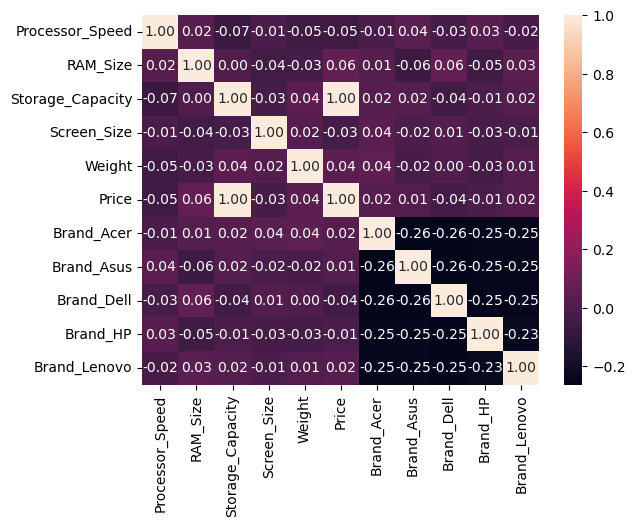

In [4]:
seaborn.heatmap(df.corr(), annot = True, fmt = ".2f")
pyplot.show()

(array([355.,   2.,   0., 296.,  11.,   0.,   0.,   0.,   4., 332.]),
 array([ 8570.01295047, 11063.40515915, 13556.79736784, 16050.18957652,
        18543.58178521, 21036.97399389, 23530.36620258, 26023.75841126,
        28517.15061995, 31010.54282863, 33503.93503731]),
 <BarContainer object of 10 artists>)

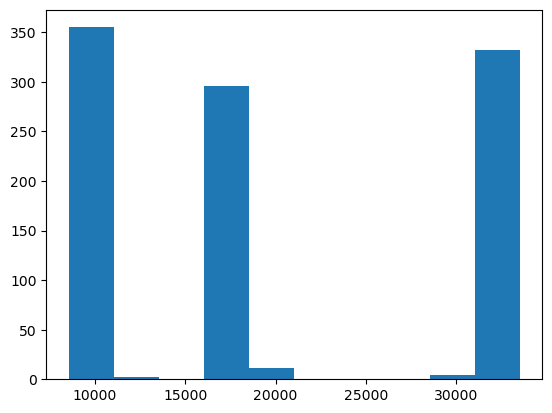

In [5]:
pyplot.hist(df["Price"])

In [6]:
def categorize(x) -> int:
    if x < 14000:
        return 1
    elif x < 24000:
            return 2
    else: 
        return 3
df["Price_Category"] = df["Price"].apply(categorize)
df = df.drop("Price", axis = 1)
df.head()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Price_Category
0,3.830296,16,512,11.185147,2.641094,False,True,False,False,False,2
1,2.912833,4,1000,11.311372,3.260012,True,False,False,False,False,3
2,3.241627,4,256,11.853023,2.029061,False,False,False,False,True,1
3,3.806248,16,512,12.280360,4.573865,True,False,False,False,False,2
4,3.268097,32,1000,14.990877,4.193472,True,False,False,False,False,3


In [7]:
from math import log2
import numpy


def calcEntropy(df, target_column = "Price_Category") :
    entropy = 0
    for i in df[target_column].unique():
        p_i = df.loc[df[target_column] == i].shape[0] / df.shape[0]
        entropy -= p_i * log2(p_i);
    #print(entropy)
    return entropy

def calcMaxGainRatio(df, target_column = "Price_Category"):
    initialEntropy = calcEntropy(df)
    result = {}
    for column in df.columns:
        if (column == target_column):
            continue
        maxGainRatio = -100000.0
        bestValue = -100000000.0
        #print(column)
        for value in df[column].unique():
            #print(value)
            firstPart = df.loc[df[column] <= value]
            secondPart = df.loc[df[column] > value]
            #print(secondPart)
            firstEntropy = calcEntropy(firstPart)
            secondEntropy = calcEntropy(secondPart)
            firstProportion = firstPart.shape[0] / df.shape[0]
            secondProportion = secondPart.shape[0] / df.shape[0]
            if secondProportion == 1 or secondProportion == 0:
                continue
            informationGain = initialEntropy - firstProportion * firstEntropy - secondProportion * secondEntropy
            #print(informationGain)
            splitInfo = -firstProportion * log2(firstProportion) - secondProportion * log2(secondProportion)
            if splitInfo == 0:
                continue
            gainRatio = informationGain / splitInfo
            if gainRatio > maxGainRatio:
                maxGainRatio = gainRatio
                bestValue = value
                result[column] = (bestValue, gainRatio)
    return result
    

print(calcMaxGainRatio(df))

{'Processor_Speed': (1.514396651245304, 0.16064598151893913), 'RAM_Size': (4, 0.0011366784660941133), 'Storage_Capacity': (512, 0.9999999999999998), 'Screen_Size': (16.95017644023471, 0.1679000844626243), 'Weight': (2.004931271337349, 0.1585469326623861), 'Brand_Acer': (False, 0.001413027589633214), 'Brand_Asus': (False, 0.0025234693043889003), 'Brand_Dell': (False, 0.0019634225941906973), 'Brand_HP': (False, 0.00287623793891155), 'Brand_Lenovo': (False, 0.0029020926058738487)}
